In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

In [ ]:
# image augmentation

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [15]:
x_train = train_datagen.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [16]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
# model creation

In [17]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [18]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [19]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [20]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

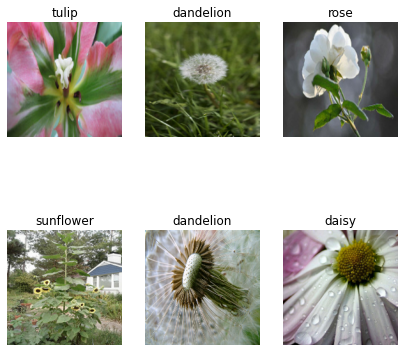

In [21]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
# add layers

In [ ]:
# Convolution layer

In [22]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

In [ ]:
# Maxpooling layer

In [23]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Flatten

In [24]:
model.add(Flatten())

In [ ]:
# Hidden/dense layers

In [25]:
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))

In [ ]:
# Output layer

In [26]:
model.add(Dense(5, activation = "softmax"))

In [ ]:
# Compiling Model

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit The Model

In [28]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 29s 636ms/step - loss: 1.9375 - accuracy: 0.3169
Epoch 2/15
44/44 [==============================] - 29s 649ms/step - loss: 1.1774 - accuracy: 0.5091
Epoch 3/15
44/44 [==============================] - 28s 636ms/step - loss: 1.0857 - accuracy: 0.5705
Epoch 4/15
44/44 [==============================] - 28s 634ms/step - loss: 1.0165 - accuracy: 0.6004
Epoch 5/15
44/44 [==============================] - 28s 633ms/step - loss: 0.9649 - accuracy: 0.6275
Epoch 6/15
44/44 [==============================] - 28s 631ms/step - loss: 0.9351 - accuracy: 0.6396
Epoch 7/15
44/44 [==============================] - 28s 631ms/step - loss: 0.8928 - accuracy: 0.6465
Epoch 8/15
44/44 [==============================] - 28s 634ms/step - loss: 0.8611 - accuracy: 0.6662
Epoch 9/15
44/44 [==============================] - 28s 632ms/step - loss: 0.8491 - accuracy: 0.6692
Epoch 10/15
44/44 [==============================] - 28s 635ms/step - loss: 0.8243 - accura

In [ ]:
# Save The Model

In [29]:
model.save("flowers.h1")

In [ ]:
# Test The Model

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model = load_model("/content/flowers.h1")

In [32]:
daisy_img = image.load_img('/content/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

In [39]:
labels = ['sunflowers','dandelion','roses','daisy','tulips']
labels[np.argmax(predicted_class)]

'daisy'

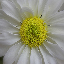

In [36]:
daisy_img